In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

from eda_schema.entity import PHASES
from eda_schema.dataset import Dataset
from eda_schema.db import SQLitePickleDB

dataset = Dataset(SQLitePickleDB("../test_data/tp_per_endpoint_5"))

In [2]:
CIRCUITS = list(dataset.db.get_table_data("netlists", netlist_id="id-000001", phase="global_route").circuit)
print("Circuits:", *CIRCUITS, sep="\n- ")

Circuits:
- ac97_ctrl
- aes_core
- des3_area
- des3_perf
- ethernet
- i2c
- mem_ctrl
- sasc
- simple_spi
- spi
- ss_pcm
- systemcaes
- systemcdes
- tv80
- usb_funct
- usb_phy
- vga_lcd
- wb_conmax
- wb_dma


In [3]:
print("Phases:", *PHASES, sep="\n- ")

Phases:
- floorplan
- global_place
- detailed_place
- cts
- global_route
- detailed_route


In [4]:
excluded_circuits = ["vga_lcd", "ethernet", "des3_perf"]
selected_circuits = [circuit for circuit in CIRCUITS if circuit not in excluded_circuits]
for circuit in selected_circuits:
    if circuit in excluded_circuits:
        continue
    print(circuit)
    dataset.load_dataset(circuit=circuit, phase="global_place")
    dataset.load_dataset(circuit=circuit, phase="detailed_place")
    dataset.load_dataset(circuit=circuit, phase="detailed_route")    

ac97_ctrl
aes_core
des3_area
i2c
mem_ctrl
sasc
simple_spi
spi
ss_pcm
systemcaes
systemcdes
tv80
usb_funct
usb_phy
wb_conmax
wb_dma


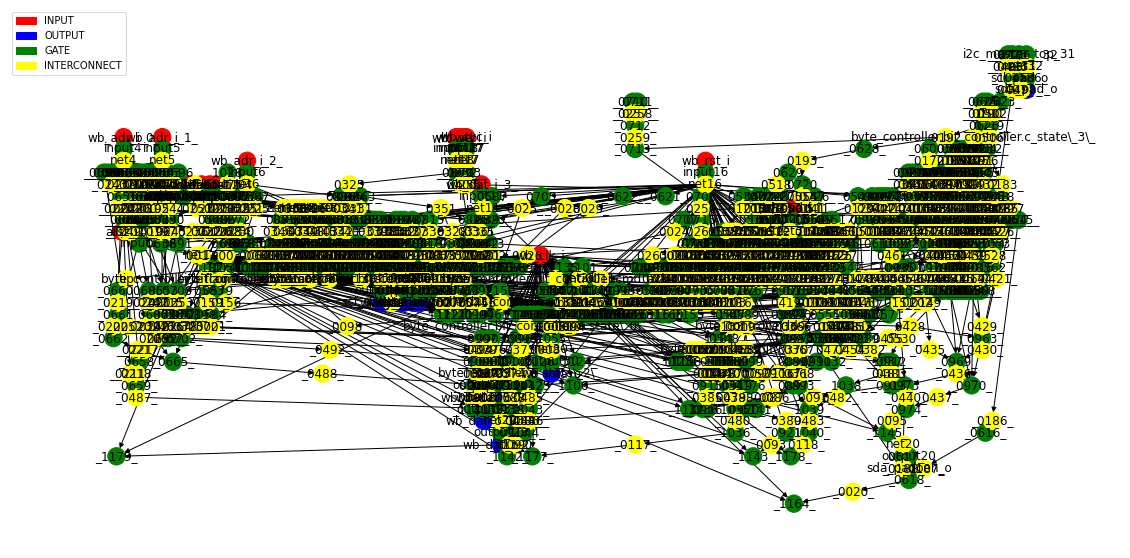

In [5]:
plt.figure(figsize=(20, 10))
netlist = dataset[("i2c", 'id-000001', "detailed_place")]
netlist.plot()

In [6]:
netlist.asdict()

{'width': 124.105,
 'height': 124.105,
 'no_of_inputs': 19,
 'no_of_outputs': 14,
 'no_of_cells': 822,
 'no_of_nets': 543,
 'utilization': 56,
 'cell_density': 0.11548187693172239,
 'pin_density': 0.34180949704973307,
 'net_density': 0.07628547344759765}

In [7]:
netlist.cell_metrics.asdict()

{'no_of_combinational_cells': 693,
 'no_of_sequential_cells': 129,
 'no_of_buffers': 31,
 'no_of_inverters': 16,
 'no_of_macros': 0,
 'no_of_total_cells': 822}

In [8]:
netlist.area_metrics.asdict()

{'combinational_cell_area': 3846.1888000000113,
 'sequential_cell_area': 3271.8879999999954,
 'buffer_area': 218.96000000000006,
 'inverter_area': 60.05759999999999,
 'macro_area': 0,
 'cell_area': 7118.076800000025,
 'net_area': 0,
 'total_area': 7118}

In [9]:
netlist.power_metrics.asdict()

{'combinational_power': 0.000535,
 'sequential_power': 0.0029,
 'macro_power': 0.0,
 'internal_power': 0.0031,
 'switching_power': 0.000342,
 'leakage_power': 2.96e-09,
 'total_power': 0.00344}

In [10]:
for node in netlist:
    print(node, netlist.nodes[node]["type"])

arst_i IO_PORT
scl_pad_i IO_PORT
scl_pad_o IO_PORT
scl_padoen_o IO_PORT
sda_pad_i IO_PORT
sda_pad_o IO_PORT
sda_padoen_o IO_PORT
wb_ack_o IO_PORT
wb_adr_i_0_ IO_PORT
wb_adr_i_1_ IO_PORT
wb_adr_i_2_ IO_PORT
wb_clk_i IO_PORT
wb_cyc_i IO_PORT
wb_dat_i_0_ IO_PORT
wb_dat_i_1_ IO_PORT
wb_dat_i_2_ IO_PORT
wb_dat_i_3_ IO_PORT
wb_dat_i_4_ IO_PORT
wb_dat_i_5_ IO_PORT
wb_dat_i_6_ IO_PORT
wb_dat_i_7_ IO_PORT
wb_dat_o_0_ IO_PORT
wb_dat_o_1_ IO_PORT
wb_dat_o_2_ IO_PORT
wb_dat_o_3_ IO_PORT
wb_dat_o_4_ IO_PORT
wb_dat_o_5_ IO_PORT
wb_dat_o_6_ IO_PORT
wb_dat_o_7_ IO_PORT
wb_inta_o IO_PORT
wb_rst_i IO_PORT
wb_stb_i IO_PORT
wb_we_i IO_PORT
net31 INTERCONNECT
_0533_ GATE
_0534_ GATE
_0536_ GATE
_0538_ GATE
_0539_ GATE
_0540_ GATE
_0541_ GATE
_0542_ GATE
_0543_ GATE
_0544_ GATE
_0546_ GATE
_0547_ GATE
_0548_ GATE
_0549_ GATE
_0550_ GATE
_0551_ GATE
_0552_ GATE
_0553_ GATE
_0554_ GATE
_0555_ GATE
_0556_ GATE
_0557_ GATE
_0558_ GATE
_0559_ GATE
_0560_ GATE
_0561_ GATE
_0562_ GATE
_0563_ GATE
_0564_ GATE
_0565

_0410_ INTERCONNECT
_0411_ INTERCONNECT
_0412_ INTERCONNECT
_0413_ INTERCONNECT
_0414_ INTERCONNECT
_0415_ INTERCONNECT
_0416_ INTERCONNECT
_0417_ INTERCONNECT
_0418_ INTERCONNECT
_0419_ INTERCONNECT
_0420_ INTERCONNECT
_0421_ INTERCONNECT
_0422_ INTERCONNECT
_0423_ INTERCONNECT
_0424_ INTERCONNECT
_0425_ INTERCONNECT
_0426_ INTERCONNECT
_0427_ INTERCONNECT
_0428_ INTERCONNECT
_0429_ INTERCONNECT
_0430_ INTERCONNECT
_0431_ INTERCONNECT
_0432_ INTERCONNECT
_0433_ INTERCONNECT
_0434_ INTERCONNECT
_0435_ INTERCONNECT
_0436_ INTERCONNECT
_0437_ INTERCONNECT
_0438_ INTERCONNECT
_0440_ INTERCONNECT
_0441_ INTERCONNECT
_0442_ INTERCONNECT
_0444_ INTERCONNECT
_0445_ INTERCONNECT
_0446_ INTERCONNECT
_0447_ INTERCONNECT
_0448_ INTERCONNECT
_0449_ INTERCONNECT
_0451_ INTERCONNECT
_0452_ INTERCONNECT
_0453_ INTERCONNECT
_0454_ INTERCONNECT
_0455_ INTERCONNECT
_0456_ INTERCONNECT
_0457_ INTERCONNECT
_0458_ INTERCONNECT
_0459_ INTERCONNECT
_0460_ INTERCONNECT
_0461_ INTERCONNECT
_0462_ INTERCONNECT


In [11]:
input_name = "arst_i"
input_entity = netlist.nodes[input_name]["entity"]
input_entity.asdict()

{'name': 'arst_i',
 'direction': 'INPUT',
 'x': 123.705,
 'y': 11.22,
 'capacitance': None}

In [12]:
output_name = "scl_pad_o"
output_entity = netlist.nodes[output_name]["entity"]
output_entity.asdict()

{'name': 'scl_pad_o',
 'direction': 'OUTPUT',
 'x': 0.4,
 'y': 9.86,
 'capacitance': None}

In [13]:
gate_name = "_0540_"
gate_entity = netlist.nodes[gate_name]["entity"]
gate_entity.asdict()

{'name': '_0540_',
 'standard_cell': 'sky130_fd_sc_hd__nor2_1',
 'no_of_fanins': 0,
 'no_of_fanouts': 1,
 'x': 25.3,
 'y': 32.64}

In [14]:
gate_name = "_0540_"
gate_entity = netlist.nodes[gate_name]["entity"]
gate_entity.asdict()

{'name': '_0540_',
 'standard_cell': 'sky130_fd_sc_hd__nor2_1',
 'no_of_fanins': 0,
 'no_of_fanouts': 1,
 'x': 25.3,
 'y': 32.64}

In [15]:
net_name = "_0244_"
net_entity = netlist.nodes[net_name]["entity"]
net_entity.asdict()

{'name': '_0244_',
 'no_of_inputs': 1,
 'no_of_outputs': 1,
 'x_min': 29.655,
 'y_min': 62.730000000000004,
 'x_max': 30.985,
 'y_max': 65.61,
 'length': None,
 'hpwl': 4.209999999999994,
 'rudy': 0.9098337292161507,
 'resistance': None,
 'capacitance': None}

{'startpoint': '_1162_',
 'endpoint': '_1158_',
 'path_type': 'max',
 'sort_index': 0,
 'arrival_time': 1.93751729,
 'required_time': -1.93751729,
 'slack': -0.14559054,
 'no_of_gates': 13,
 'is_critical_path': False}

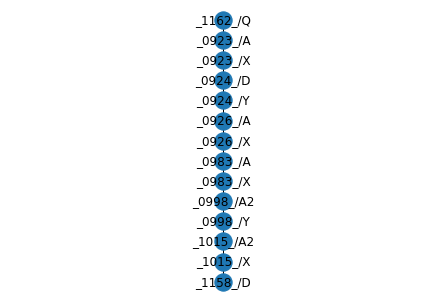

In [16]:
timing_path = netlist.timing_paths[('_1162_', '_1158_', 'max')][0]
timing_path.plot()
timing_path.asdict()

In [17]:
for node in timing_path:
    timing_point_entity = timing_path.nodes[node]["entity"]
    print(timing_point_entity.asdict())

{'name': '_1162_/Q', 'gate': '_1162_', 'standard_cell': 'sky130_fd_sc_hd__dfrtp_4', 'pin': 'Q', 'cell_delay': 0.48291412, 'arrival_time': 0.49291411, 'slew': 0.0834127, 'is_rise_transition': False, 'is_fall_transition': True, 'node_depth': 0}
{'name': '_0923_/A', 'gate': '_0923_', 'standard_cell': 'sky130_fd_sc_hd__or4_1', 'pin': 'A', 'cell_delay': 0.0, 'arrival_time': 0.49291411, 'slew': 0.0834127, 'is_rise_transition': False, 'is_fall_transition': True, 'node_depth': 1}
{'name': '_0923_/X', 'gate': '_0923_', 'standard_cell': 'sky130_fd_sc_hd__or4_1', 'pin': 'X', 'cell_delay': 0.57112002, 'arrival_time': 1.0640341, 'slew': 0.11924391, 'is_rise_transition': False, 'is_fall_transition': True, 'node_depth': 2}
{'name': '_0924_/D', 'gate': '_0924_', 'standard_cell': 'sky130_fd_sc_hd__nor4_4', 'pin': 'D', 'cell_delay': 0.0, 'arrival_time': 1.0640341, 'slew': 0.11924391, 'is_rise_transition': False, 'is_fall_transition': True, 'node_depth': 3}
{'name': '_0924_/Y', 'gate': '_0924_', 'standar

In [18]:
import pandas as pd
data = []
for key, netlist in dataset.items():
    if "detailed_route" not in key:
        continue
    for tp_list in netlist.timing_paths.values():
        for tp in tp_list:
            data.append({**{'circuit': key[0], 'netlist_id': 'id-000020', 'phase': 'detailed_route'}, **tp.asdict()})
            data[-1]["no_of_gates"] = (data[-1]["no_of_gates"])//2
pd.DataFrame(data)

,circuit,netlist_id,phase,startpoint,endpoint,path_type,sort_index,arrival_time,required_time,slack,no_of_gates,is_critical_path
0,ac97_ctrl,id-000020,detailed_route,rst_i,_09319_,min,0,0.665531,-0.665531,0.186720,5,False
1,ac97_ctrl,id-000020,detailed_route,rst_i,_09723_,min,0,0.665531,-0.665531,0.186720,5,False
2,ac97_ctrl,id-000020,detailed_route,rst_i,_10079_,min,0,0.665531,-0.665531,0.186720,5,False
3,ac97_ctrl,id-000020,detailed_route,rst_i,_10165_,min,0,0.665531,-0.665531,0.186720,5,False
4,ac97_ctrl,id-000020,detailed_route,rst_i,_10360_,min,0,0.665531,-0.665531,0.186720,5,False
...,...,...,...,...,...,...,...,...,...,...,...,...
114723,wb_dma,id-000020,detailed_route,_3960_,_3568_,max,0,2.192074,-2.192074,-0.415074,6,False
114724,wb_dma,id-000020,detailed_route,_3952_,_3539_,max,0,2.207479,-2.207479,-0.414853,6,False
114725,wb_dma,id-000020,detailed_route,_3952_,_3539_,max,1,2.203421,-2.203421,-0.410795,8,False
114726,wb_dma,id-000020,detailed_route,_3956_,_3957_,max,0,2.189373,-2.189373,-0.408262,8,False


In [19]:
timing_path_df = dataset.db.get_table_data("timing_paths", phase="detailed_route", path_type="max")
timing_path_df

,circuit,netlist_id,phase,startpoint,endpoint,path_type,sort_index,arrival_time,required_time,slack,no_of_gates,is_critical_path
0,ac97_ctrl,id-000001,detailed_route,rst_i,_09087_,max,0.0,1.325458,-1.325458,0.698852,15.0,0
1,ac97_ctrl,id-000001,detailed_route,rst_i,_10083_,max,0.0,1.325458,-1.325458,0.698852,15.0,0
2,ac97_ctrl,id-000001,detailed_route,rst_i,_10099_,max,0.0,1.325458,-1.325458,0.698852,15.0,0
3,ac97_ctrl,id-000001,detailed_route,rst_i,_10101_,max,0.0,1.325458,-1.325458,0.698852,15.0,0
4,ac97_ctrl,id-000001,detailed_route,rst_i,_10107_,max,0.0,1.325458,-1.325458,0.698852,15.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
241144,wb_dma,id-000001,detailed_route,_3960_,_3568_,max,0.0,2.192074,-2.192074,-0.415074,13.0,0
241145,wb_dma,id-000001,detailed_route,_3952_,_3539_,max,0.0,2.207479,-2.207479,-0.414853,13.0,0
241146,wb_dma,id-000001,detailed_route,_3952_,_3539_,max,1.0,2.203421,-2.203421,-0.410795,17.0,0
241147,wb_dma,id-000001,detailed_route,_3956_,_3957_,max,0.0,2.189373,-2.189373,-0.408262,17.0,0


Text(0.5, 0, 'Timing path size')

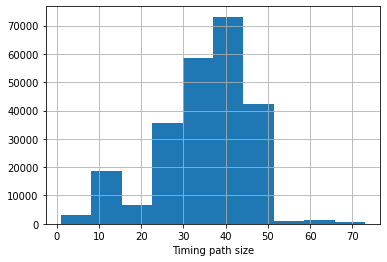

In [20]:
timing_path_df.no_of_gates.hist()
plt.xlabel("Timing path size")

Text(0.5, 0, 'Arrival Time (ns)')

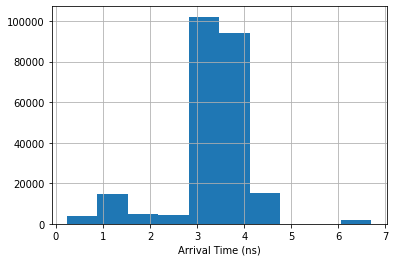

In [21]:
timing_path_df.arrival_time.hist()
plt.xlabel("Arrival Time (ns)")

In [22]:
area_metrics_df = dataset.db.get_table_data("power_metrics", phase="detailed_route")
area_metrics_df

,circuit,netlist_id,phase,combinational_power,sequential_power,macro_power,internal_power,switching_power,leakage_power,total_power
0,ac97_ctrl,id-000001,detailed_route,0.001570,0.03930,0.0,0.05750,0.009150,4.040000e-08,0.06670
1,aes_core,id-000001,detailed_route,0.314000,0.02520,0.0,0.18100,0.169000,4.580000e-08,0.35000
2,des3_area,id-000001,detailed_route,0.023000,0.00239,0.0,0.01520,0.011300,1.190000e-08,0.02650
3,des3_perf,id-000001,detailed_route,0.516000,0.29700,0.0,0.61200,0.343000,2.190000e-07,0.95500
4,ethernet,id-000001,detailed_route,0.019900,0.21000,0.0,0.33900,0.058700,2.530000e-07,0.39700
5,i2c,id-000001,detailed_route,0.000652,0.00291,0.0,0.00466,0.000975,3.470000e-09,0.00564
6,mem_ctrl,id-000001,detailed_route,0.065300,0.02870,0.0,0.06970,0.037500,2.840000e-08,0.10700
7,sasc,id-000001,detailed_route,0.001450,0.00361,0.0,0.00554,0.001510,2.700000e-09,0.00705
8,simple_spi,id-000001,detailed_route,0.000758,0.00317,0.0,0.00494,0.001070,3.090000e-09,0.00601
9,spi,id-000001,detailed_route,0.018700,0.00684,0.0,0.01870,0.010300,8.110000e-09,0.02900


In [23]:
timing_paths_df = dataset.db.get_table_data("timing_paths", phase="detailed_route", path_type="max")
timing_paths_df

,circuit,netlist_id,phase,startpoint,endpoint,path_type,sort_index,arrival_time,required_time,slack,no_of_gates,is_critical_path
0,ac97_ctrl,id-000001,detailed_route,rst_i,_09087_,max,0.0,1.325458,-1.325458,0.698852,15.0,0
1,ac97_ctrl,id-000001,detailed_route,rst_i,_10083_,max,0.0,1.325458,-1.325458,0.698852,15.0,0
2,ac97_ctrl,id-000001,detailed_route,rst_i,_10099_,max,0.0,1.325458,-1.325458,0.698852,15.0,0
3,ac97_ctrl,id-000001,detailed_route,rst_i,_10101_,max,0.0,1.325458,-1.325458,0.698852,15.0,0
4,ac97_ctrl,id-000001,detailed_route,rst_i,_10107_,max,0.0,1.325458,-1.325458,0.698852,15.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
241144,wb_dma,id-000001,detailed_route,_3960_,_3568_,max,0.0,2.192074,-2.192074,-0.415074,13.0,0
241145,wb_dma,id-000001,detailed_route,_3952_,_3539_,max,0.0,2.207479,-2.207479,-0.414853,13.0,0
241146,wb_dma,id-000001,detailed_route,_3952_,_3539_,max,1.0,2.203421,-2.203421,-0.410795,17.0,0
241147,wb_dma,id-000001,detailed_route,_3956_,_3957_,max,0.0,2.189373,-2.189373,-0.408262,17.0,0


<AxesSubplot:>

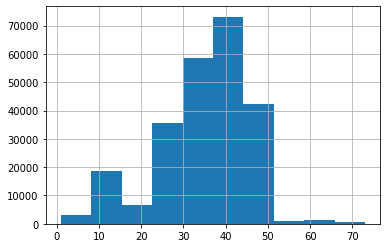

In [24]:
timing_paths_df.no_of_gates.hist()

<AxesSubplot:>

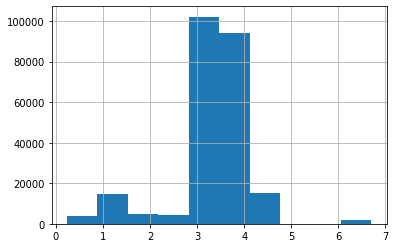

In [25]:
timing_paths_df.arrival_time.hist()

In [36]:
import re
import hashlib

def mae(target, predicted):
    """
    Calculate Mean Absolute Error (MAE)
    """
    if len(target) != len(predicted):
        raise ValueError("Target and predicted lists must have the same length.")
    return round(sum(abs(t - p) for t, p in zip(target, predicted)) / len(target), 4)


def mape(target, predicted):
    """
    Calculate Mean Absolute Percentage Error (MAPE)
    """
    if len(target) != len(predicted):
        raise ValueError("Target and predicted lists must have the same length.")
    return sum(abs(t - p) / abs(t) for t, p in zip(target, predicted) if t != 0) / len(target) * 100


def strip_integer_suffix(input_string):
    """Removes trailing digits from a string."""
    return re.sub(r'\d+$', '', input_string)

def should_skip_standard_cell(standard_cell):
    """Checks if the standard cell contains 'buf', 'metal', or 'inv'."""
    return any(keyword in standard_cell for keyword in ['buf'])

def generate_timing_path_hash(timing_path):
    """Generates a unique hash string for a timing path."""
    hash_str = timing_path.startpoint + timing_path.endpoint + timing_path.path_type
    
    for node in timing_path:
        entity = timing_path.nodes[node]["entity"]
        entity.standard_cell = strip_integer_suffix(entity.standard_cell)
        
        if should_skip_standard_cell(entity.standard_cell):
            continue
        
        hash_str += f"{entity.standard_cell}{entity.pin}{entity.is_rise_transition}"
    
    return hashlib.sha256(hash_str.encode()).hexdigest()

"""Builds a nested dictionary of timing paths for circuits and phases."""
timing_path_dict = {}

for circuit in selected_circuits:
    timing_path_dict[circuit] = {}
    for phase in ["global_place", "detailed_place", "detailed_route"]:
        timing_path_dict[circuit][phase] = {}
        netlist = dataset[(circuit, 'id-000001', phase)]

        for timing_paths in netlist.timing_paths.values():
            for timing_path in timing_paths:
                path_hash = generate_timing_path_hash(timing_path)
                if path_hash not in timing_path_dict[circuit][phase]:
                    timing_path_dict[circuit][phase][path_hash] = timing_path

In [37]:
data = []
for circuit in selected_circuits:
    phase1 = "global_place"
    phase2 = "detailed_route"
    intersect_keys = set(timing_path_dict[circuit][phase1].keys()).intersection(set(timing_path_dict[circuit][phase2].keys()))
    phase1_data, phase2_data = [], []
    for key in intersect_keys:
        phase1_data.append(timing_path_dict[circuit][phase1][key].arrival_time)
        phase2_data.append(timing_path_dict[circuit][phase2][key].arrival_time)
    phase1_netlist = dataset[(circuit, 'id-000001', phase1)]
    phase2_netlist = dataset[(circuit, 'id-000001', phase2)]
    data.append({
        "circuit": circuit,
        f"No. of total timing paths ({phase1})": sum([len(tp) for tp in phase1_netlist.timing_paths]),
        f"No. of total timing paths ({phase2})": sum([len(tp) for tp in phase2_netlist.timing_paths]),
        "No. of common timing paths": len(intersect_keys),
        "MAE (Baseline)": mae(phase2_data, phase1_data),
        "MAPE (Baseline)": mape(phase2_data, phase1_data),
    })

result_df = pd.DataFrame(data).set_index("circuit")
result_df.loc["average"] = result_df.mean()
result_df

,No. of total timing paths (global_place),No. of total timing paths (detailed_route),No. of common timing paths,MAE (Baseline),MAPE (Baseline)
circuit,,,,,
ac97_ctrl,31872.000,28926.000,12499.00,0.205700,17.676000
aes_core,3927.000,4902.000,2034.00,0.088900,13.126080
des3_area,1182.000,1125.000,434.00,0.179800,36.315438
i2c,2754.000,2370.000,916.00,0.201400,43.523284
mem_ctrl,16917.000,14550.000,3962.00,0.044400,7.388147
sasc,1560.000,1587.000,750.00,0.083500,6.855732
simple_spi,2304.000,2364.000,988.00,0.110800,13.434807
spi,3840.000,4050.000,539.00,0.152600,28.292494
ss_pcm,1389.000,1395.000,714.00,0.203900,30.960755


In [38]:
data = []
for circuit in selected_circuits:
    phase1 = "detailed_place"
    phase2 = "detailed_route"
    intersect_keys = set(timing_path_dict[circuit][phase1].keys()).intersection(set(timing_path_dict[circuit][phase2].keys()))
    phase1_data, phase2_data = [], []
    for key in intersect_keys:
        phase1_data.append(timing_path_dict[circuit][phase1][key].arrival_time)
        phase2_data.append(timing_path_dict[circuit][phase2][key].arrival_time)
    phase1_netlist = dataset[(circuit, 'id-000001', phase1)]
    phase2_netlist = dataset[(circuit, 'id-000001', phase2)]
    data.append({
        "circuit": circuit,
        f"No. of total timing paths ({phase1})": sum([len(tp) for tp in phase1_netlist.timing_paths]),
        f"No. of total timing paths ({phase2})": sum([len(tp) for tp in phase2_netlist.timing_paths]),
        "No. of common timing paths": len(intersect_keys),
        "MAE (Baseline)": mae(phase2_data, phase1_data),
        "MAPE (Baseline)": mape(phase2_data, phase1_data),
    })

result_df = pd.DataFrame(data).set_index("circuit")
result_df.loc["average"] = result_df.mean()
result_df

,No. of total timing paths (detailed_place),No. of total timing paths (detailed_route),No. of common timing paths,MAE (Baseline),MAPE (Baseline)
circuit,,,,,
ac97_ctrl,27945.000,28926.000,15702.0000,0.042200,3.316749
aes_core,4389.000,4902.000,2522.0000,0.053100,5.466767
des3_area,978.000,1125.000,540.0000,0.062600,7.692363
i2c,2457.000,2370.000,1141.0000,0.058900,6.962419
mem_ctrl,13068.000,14550.000,4482.0000,0.061500,7.579149
sasc,1503.000,1587.000,784.0000,0.022900,1.654636
simple_spi,2253.000,2364.000,1045.0000,0.050800,5.757539
spi,4674.000,4050.000,1105.0000,0.035100,6.345870
ss_pcm,1332.000,1395.000,858.0000,0.036600,7.226319
